#### Understaing Business Problem

**Context:**

Jamboree has helped thousands of students make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.

They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.


**Problem Statement:**

Help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

**Column Profiling:**

- Serial No. (Unique row ID) - Delete it
- GRE Scores (out of 340) - Numeric Discrete
- TOEFL Scores (out of 120) - Numeric Discrete
- University Rating (out of 5) - Categorical Ordinal
- Statement of Purpose strength (out of 5)
- Letter of Recommendation Strength (out of 5) - Categorical Ordinal
- Undergraduate GPA (out of 10) - Numeric Discrete
- Research Experience (either 0 or 1) - Categorical Binary
- Chance of Admit (ranging from 0 to 1) - Numeric Continuous

**Concept Used:**
- Exploratory Data Analysis
- Linear Regression

#### Exploratory Data Anlaysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error, adjusted_mutual_info_score
from sklearn.feature_selection import f_regression

In [5]:
import pandas as pd
df = pd.read_csv('C:\\Users\\mayan\\Desktop\\Portfolio Projects\\ML_Supervised_Regression\\Jamboree_Admission_Probability_Predictor\\Data_Jamboree.csv')
df

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73


In [6]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(' ','_')
df.rename(columns={'chance_of_admit_':'chance_of_admit'}, inplace=True)
df.rename(columns={'lor_':'lor'}, inplace=True)
df.drop(columns=['serial_no.'], inplace=True)
df

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [7]:
df.info()
# Check Missing val columns (drop or impute)
# Check Data types of columns (change if needed)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gre_score          500 non-null    int64  
 1   toefl_score        500 non-null    int64  
 2   university_rating  500 non-null    int64  
 3   sop                500 non-null    float64
 4   lor                500 non-null    float64
 5   cgpa               500 non-null    float64
 6   research           500 non-null    int64  
 7   chance_of_admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [10]:
df.describe().round(2)
# Check Central tendency (mean, median). (Transform col if skeewed)
# Check Spread (std, min, max). (Scale to uniform the ranges of cols)
# Check Outliers (if max >>> 75th percentile). (Treat or remove outliers)

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
count,500.00,500.00,500.00,500.00,500.00,500.00,500.00,500.00
mean,316.47,107.19,3.11,3.37,3.48,8.58,0.56,0.72
std,11.30,6.08,1.14,0.99,0.93,0.60,0.50,0.14
min,290.00,92.00,1.00,1.00,1.00,6.80,0.00,0.34
25%,308.00,103.00,2.00,2.50,3.00,8.13,0.00,0.63
50%,317.00,107.00,3.00,3.50,3.50,8.56,1.00,0.72
75%,325.00,112.00,4.00,4.00,4.00,9.04,1.00,0.82
max,340.00,120.00,5.00,5.00,5.00,9.92,1.00,0.97


In [12]:
df.duplicated().sum()
# Checks for duplicate rows.
# Remove by df.drop_duplicates(inplace=True).

0

In [26]:
df.isnull().sum()[lambda x: x > 0]

Series([], dtype: int64)

In [11]:
df.nunique()
# Classify columns (categorical vs continuous).
# Encode categorical columns.
# Drop ID-like columns with all unique values.

gre_score             49
toefl_score           29
university_rating      5
sop                    9
lor                    9
cgpa                 184
research               2
chance_of_admit       61
dtype: int64

In [20]:
df['sop'].value_counts().sort_index()
# Frequency of unique values in a column.
# Check Categorical value distribution.
# Imbalance detection.
# Combine rare categories.
# Encode categories.

1.0     6
1.5    25
2.0    43
2.5    64
3.0    80
3.5    88
4.0    89
4.5    63
5.0    42
Name: sop, dtype: int64

In [16]:
df.corr().round(2)
# Check Relation with features to target. (Analyse importance of features) 
# Check Multicollinearity among feature. (Remove highly correlated features)
# Do Feature engineering, Regularization or dimensionality reduction (PCA).

,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,chance_of_admit
gre_score,1.00,0.83,0.64,0.61,0.52,0.83,0.56,0.81
toefl_score,0.83,1.00,0.65,0.64,0.54,0.81,0.47,0.79
university_rating,0.64,0.65,1.00,0.73,0.61,0.71,0.43,0.69
sop,0.61,0.64,0.73,1.00,0.66,0.71,0.41,0.68
lor,0.52,0.54,0.61,0.66,1.00,0.64,0.37,0.65
cgpa,0.83,0.81,0.71,0.71,0.64,1.00,0.50,0.88
research,0.56,0.47,0.43,0.41,0.37,0.50,1.00,0.55
chance_of_admit,0.81,0.79,0.69,0.68,0.65,0.88,0.55,1.00


In [ ]:
# df.groupby(col).mean()
# Aggregate statistics grouped by categories. (if required)

** Understand the data**

- Categoric Numeric

University Rating, SOP, LOR, and Research are categorical ordinal variables, and rest of the features are numeric continuous.

- Granularity

Data has records of 500 students, each row contains details of their test scores. (No grouping required)



In [124]:
numeric_df = df.select_dtypes(include=['number'])

In [245]:
X = df.drop(target_col, axis=1)
y = df[target_col] #.values.reshape(-1,1)
target_col = y.name

#### Visual Analysis

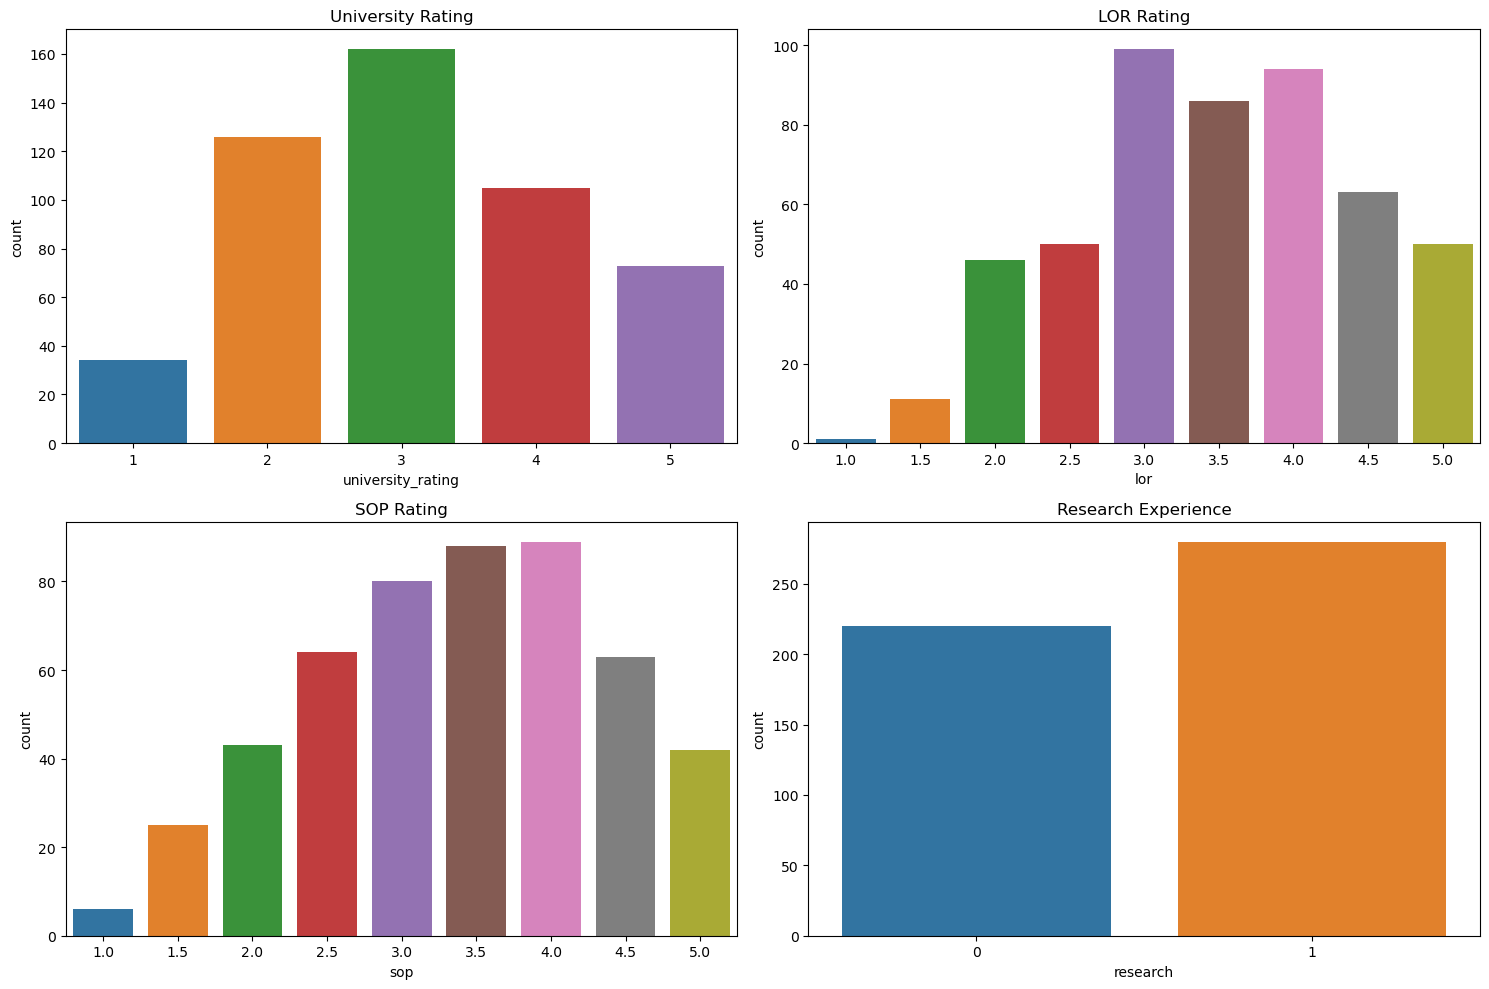

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.countplot(x="university_rating", data=df)
plt.title("University Rating")

plt.subplot(2, 2, 2)
sns.countplot(x="lor", data=df)
plt.title("LOR Rating")

plt.subplot(2, 2, 3)
sns.countplot(x="sop", data=df)
plt.title("SOP Rating")

plt.subplot(2, 2, 4)
sns.countplot(x="research", data=df)
plt.title("Research Experience")

plt.tight_layout()
plt.show()


##### Linearity

<Figure size 1000x1000 with 0 Axes>

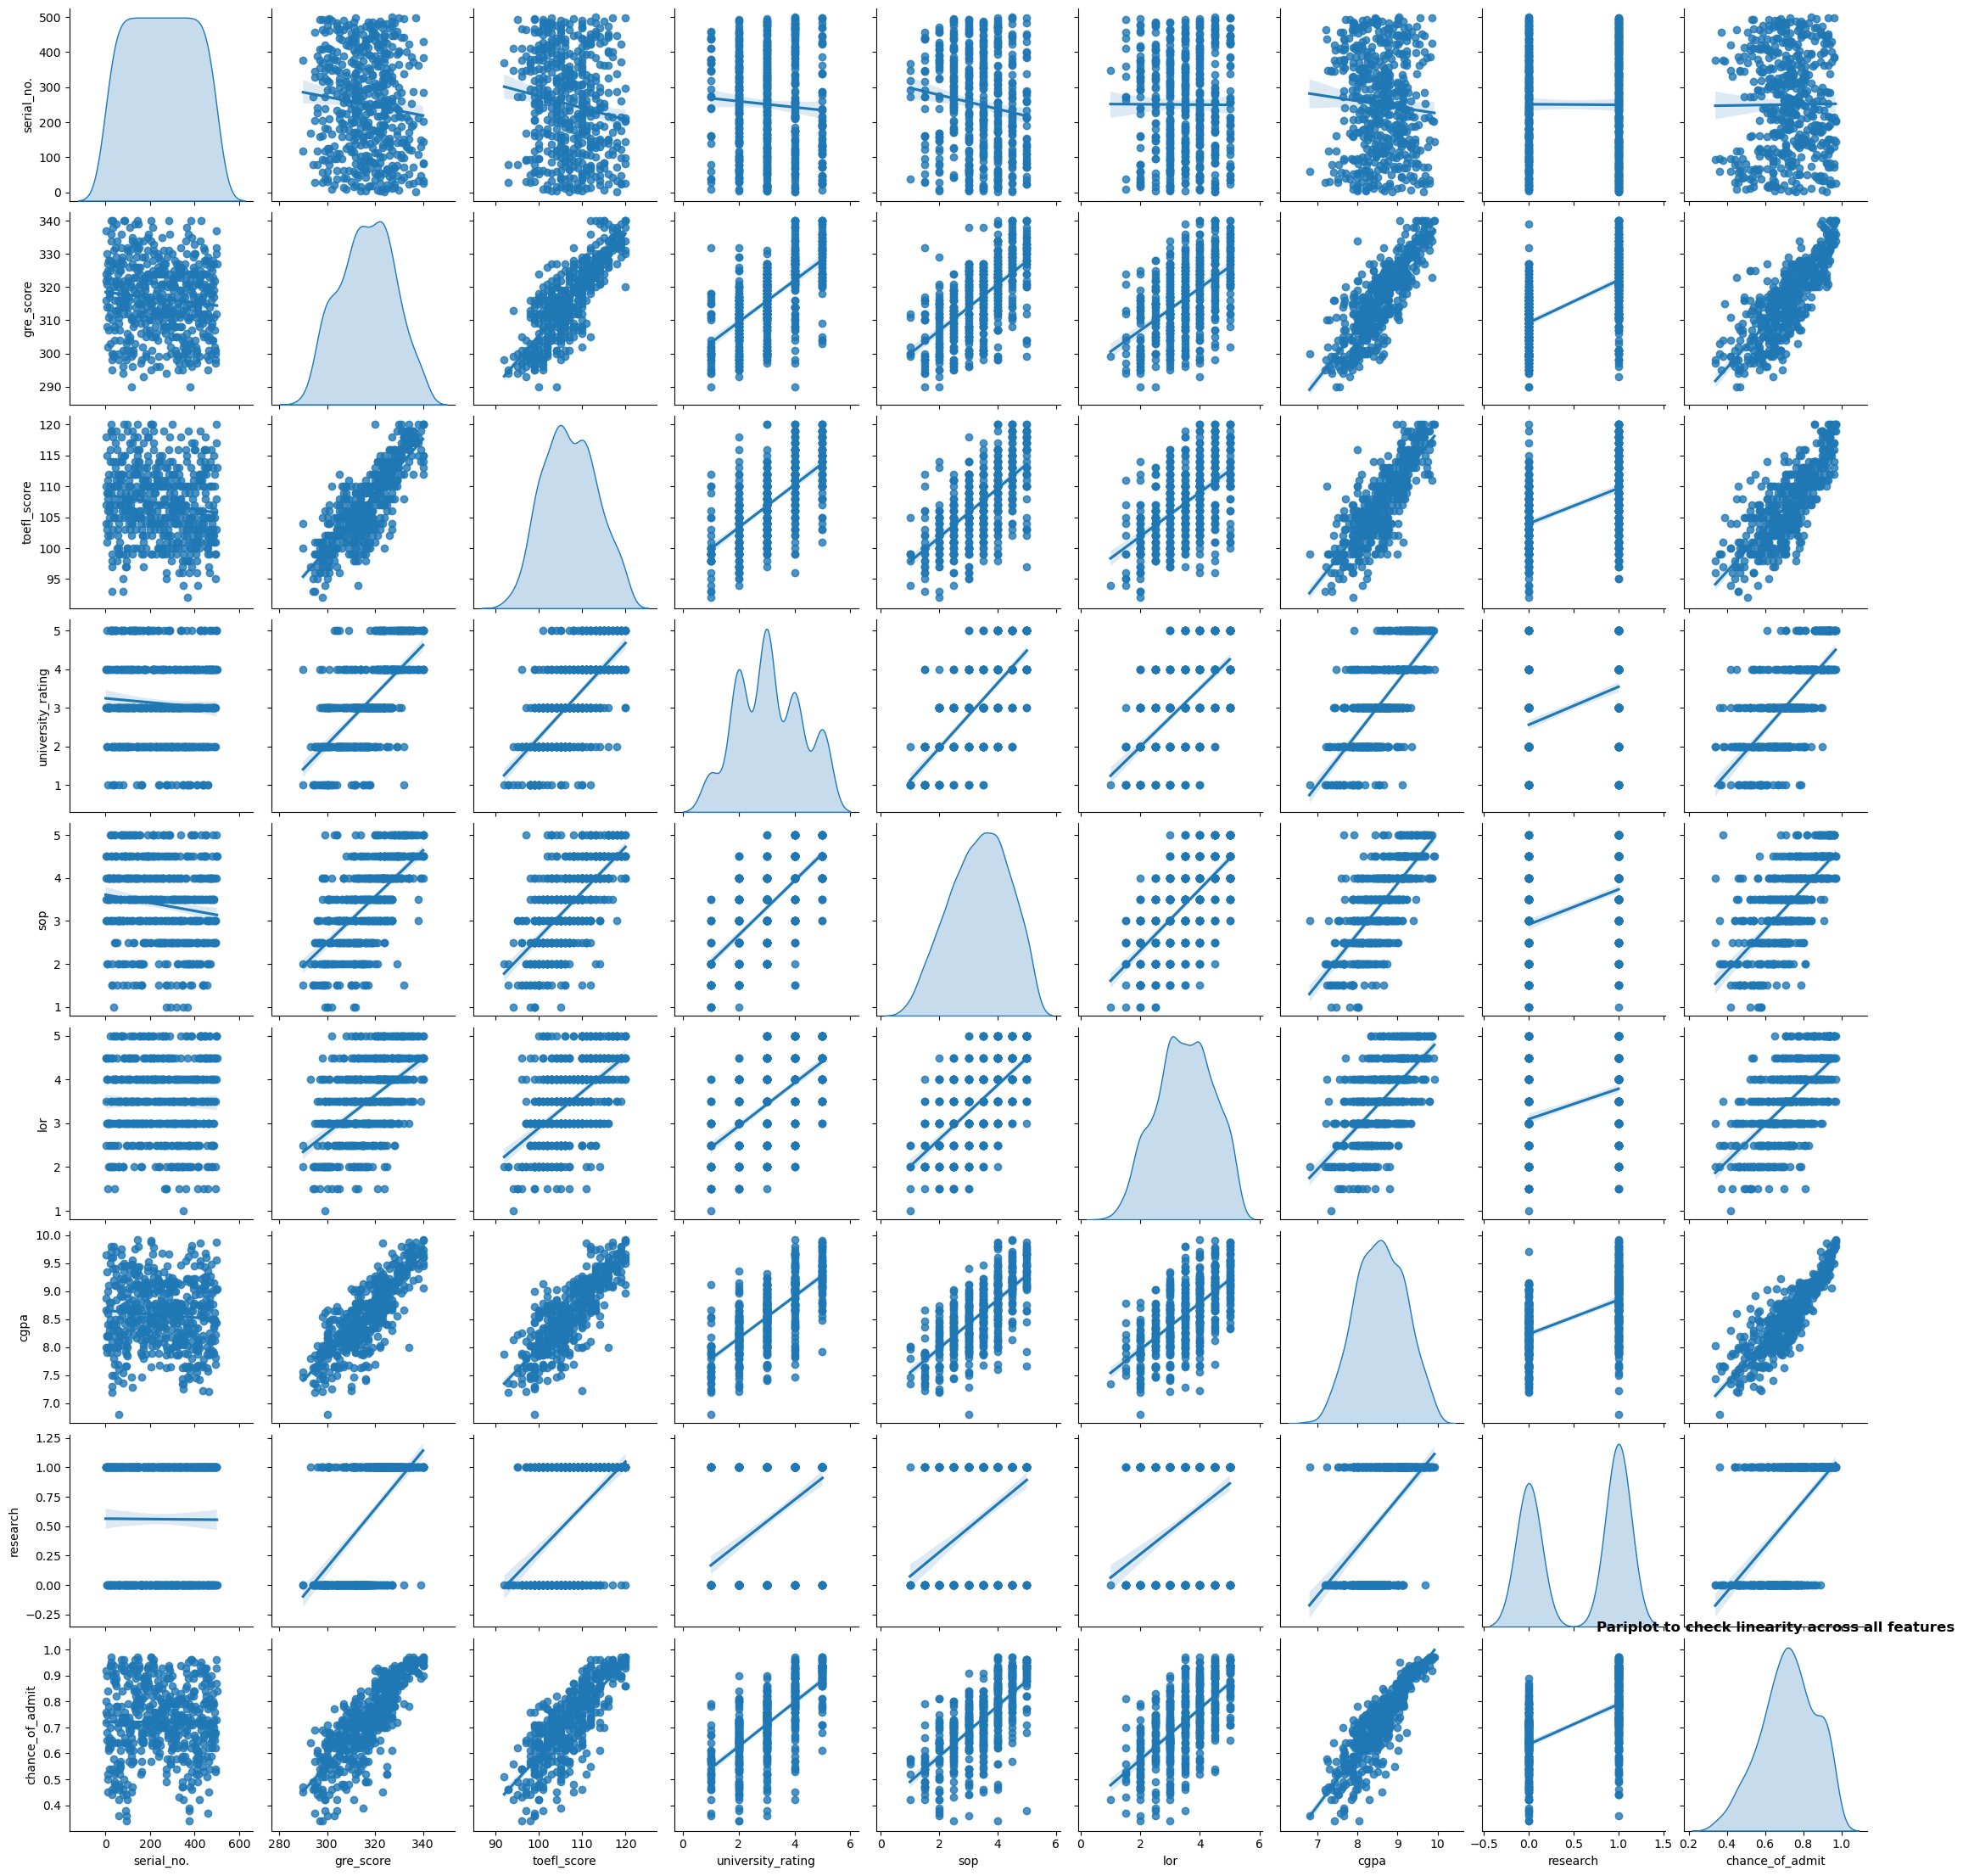

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize = (10,10))
sns.pairplot(numeric_df, kind="reg", diag_kind="kde")  # or diag_kind="hist"
plt.title(f"Pariplot to check linearity across all features", fontweight = 'bold')
plt.show()

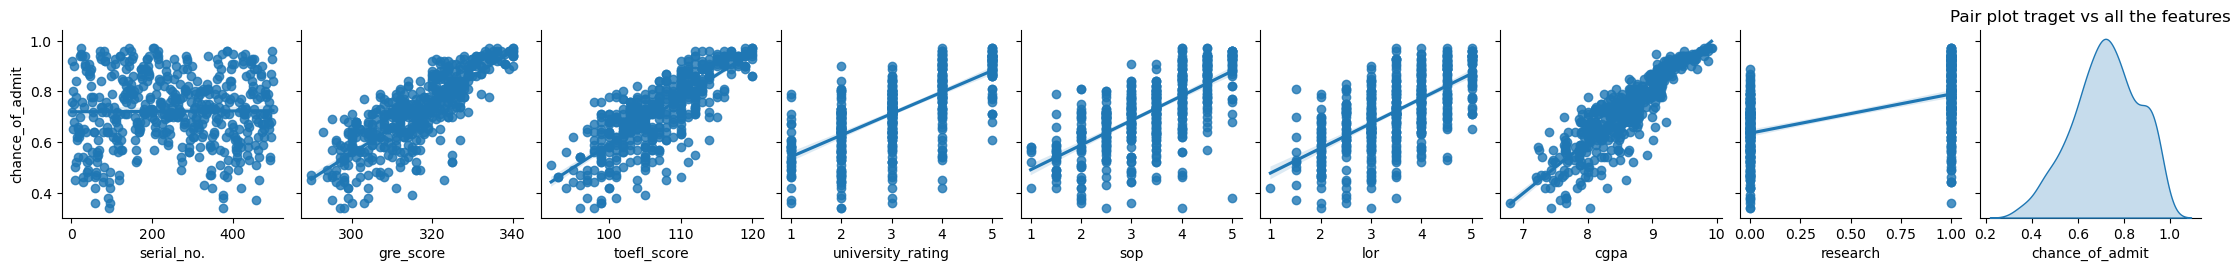

In [146]:
sns.pairplot(df, y_vars = df.columns[-1], kind="reg", diag_kind="kde")
plt.title("Pair plot traget vs all the features")
plt.show()

##### Correlation

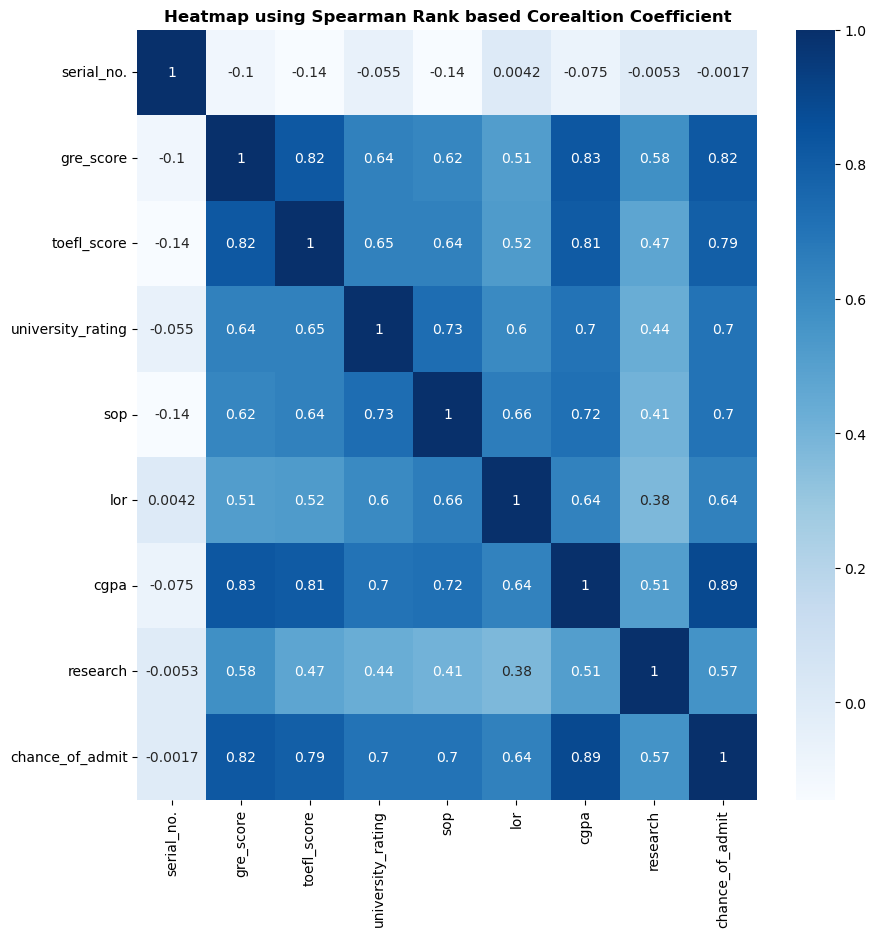

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize = (10,10))
sns.heatmap(numeric_df.corr(method = 'spearman'), annot=True, cmap = "Blues")
plt.title(f"Heatmap using Spearman Rank based Corealtion Coefficient", fontweight = 'bold')
plt.show()

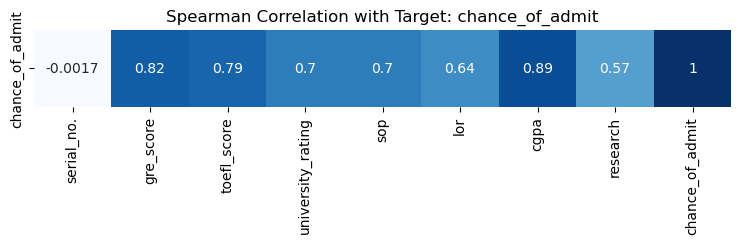

In [148]:
target_col = numeric_df.columns[-1]  # assuming the last column is the target
corr_with_target = numeric_df.corr(method='spearman')[[target_col]].T  # Transpose to get features on x-axis
plt.figure(figsize=(len(corr_with_target.columns) * 1, 1))
sns.heatmap(corr_with_target, annot=True, cmap="Blues", cbar=False)
plt.title(f"Spearman Correlation with Target: {target_col}")
plt.show()

##### QQ Plot

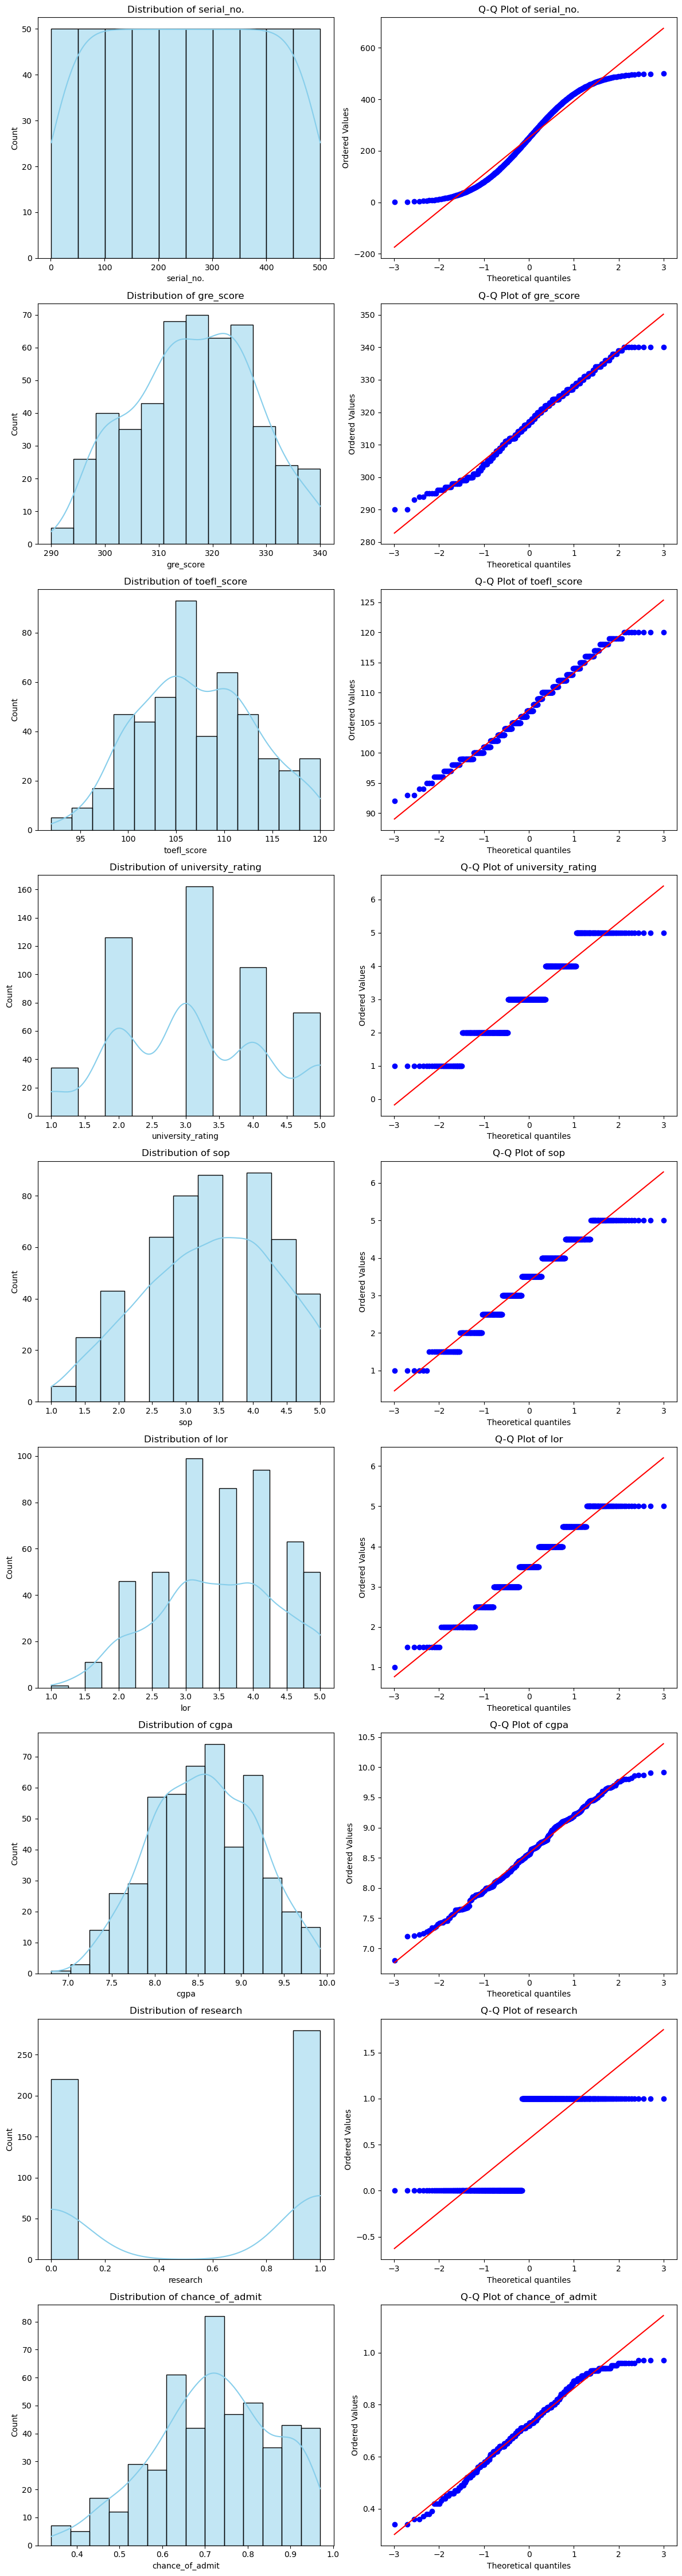

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
numerical_cols = df.select_dtypes(include='number').columns

# Set up the figure if making a single type plot and remove ax from fuction
# plt.figure(figsize=(10, len(numeric_cols) * 4)) 

# Set up the figure if making multiple type plots
n_cols = 2
n_rows = len(numerical_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 5 * n_rows))

for i, col in enumerate(numerical_cols):
    # Distplot
    sns.histplot(df[col], kde=True, ax=axes[i, 0], color='skyblue')
    axes[i, 0].set_title(f'Distribution of {col}')
    
    # QQ Plot
    stats.probplot(df[col], dist="norm", plot=axes[i, 1])
    axes[i, 1].set_title(f'Q-Q Plot of {col}')

plt.tight_layout()
plt.show()


##### Outliers

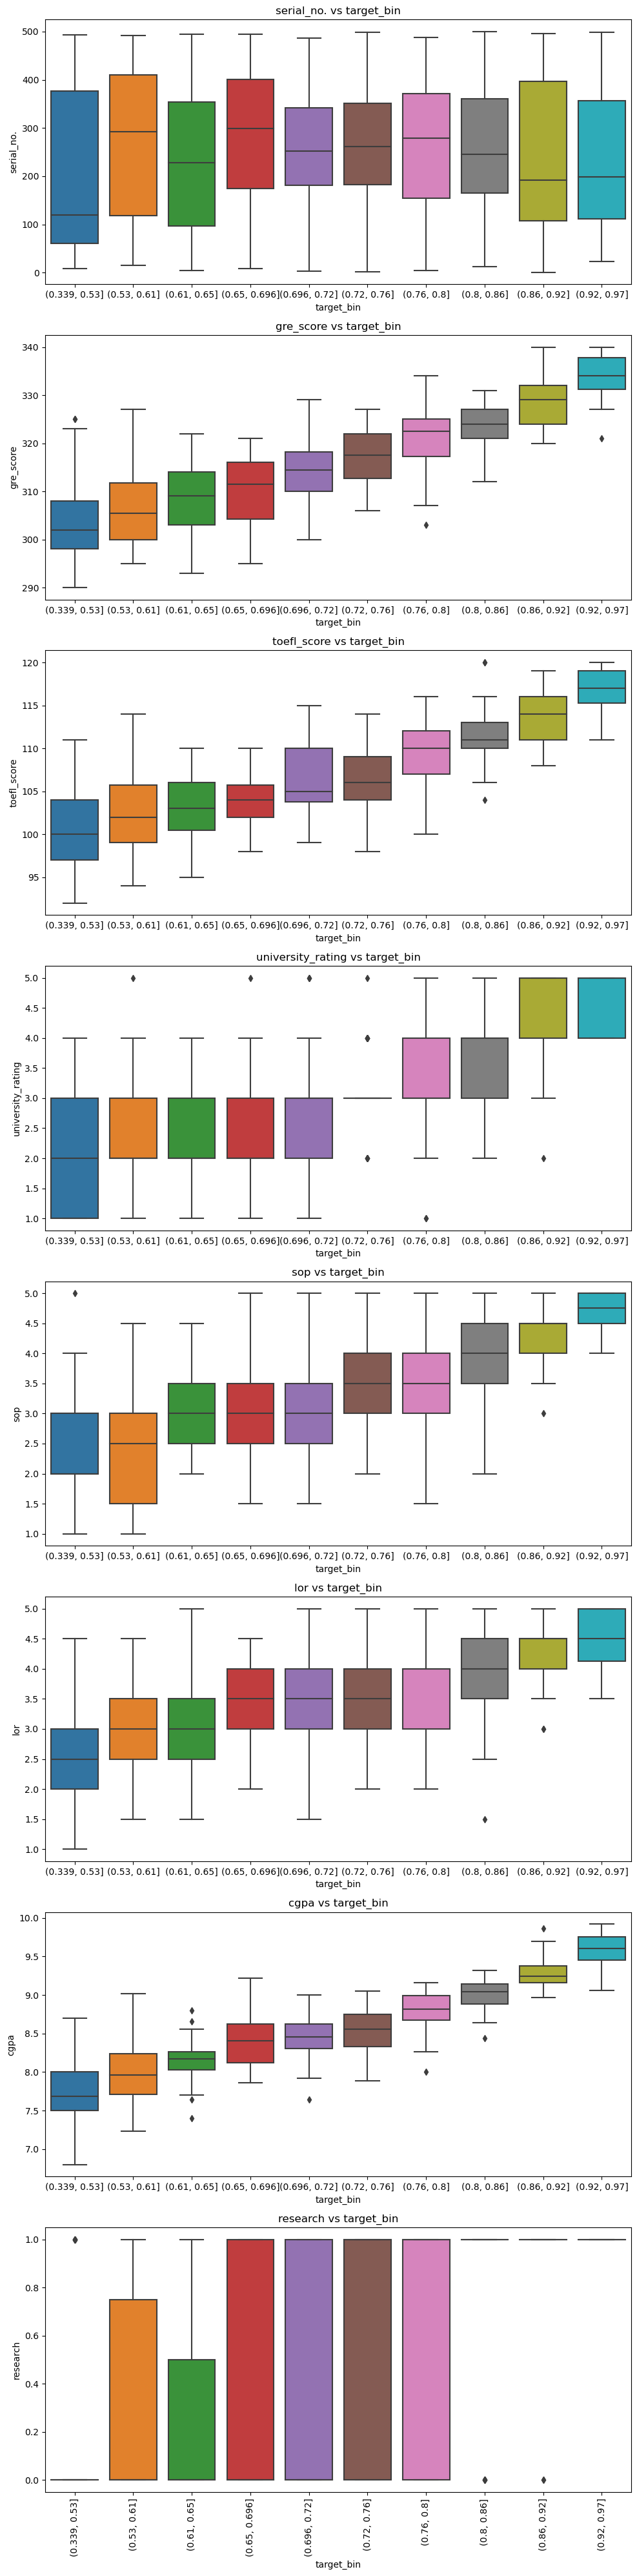

In [150]:
import matplotlib.pyplot as plt
import pandas as pd

# categorical column
df["target_bin"] = pd.qcut(y, q=10)
cat_col = "target_bin"     # or define any other categorical column OR None

# Select numeric columns
num_cols = df.select_dtypes(include='number').drop(columns=y.name).columns

# Set up subplot grid
n = len(num_cols)
fig, axes = plt.subplots(n, 1, figsize=(10, 5*n))

# Plot each boxplot
for i, col in enumerate(num_cols):
    sns.boxplot(x=cat_col, y=col, data=df, ax=axes[i])
    plt.xticks(rotation = 90)
    axes[i].set_title(f'{col} vs {cat_col}')

plt.tight_layout()
plt.show()

df.drop(columns=["target_bin"], inplace=True)

In [154]:
def detect_outliers(data):
     length_before = len(data)
     Q1 = np.percentile(data,25)
     Q3 = np.percentile(data,75)
     IQR = Q3-Q1
     upperbound = Q3+1.5*IQR
     lowerbound = Q1-1.5*IQR
     if lowerbound < 0:
         lowerbound = 0
     length_after = len(data[(data>=lowerbound)&(data<=upperbound)])
     return f"{np.round((length_before-length_after)/length_before,3)} % Outliers data from input data found"
for col in df.columns:
 print(col," : ",detect_outliers(df[col]))

serial_no.  :  0.0 % Outliers data from input data found
gre_score  :  0.0 % Outliers data from input data found
toefl_score  :  0.0 % Outliers data from input data found
university_rating  :  0.0 % Outliers data from input data found
sop  :  0.0 % Outliers data from input data found
lor  :  0.002 % Outliers data from input data found
cgpa  :  0.0 % Outliers data from input data found
research  :  0.0 % Outliers data from input data found
chance_of_admit  :  0.004 % Outliers data from input data found


##### Categorical features vs target boxplots:

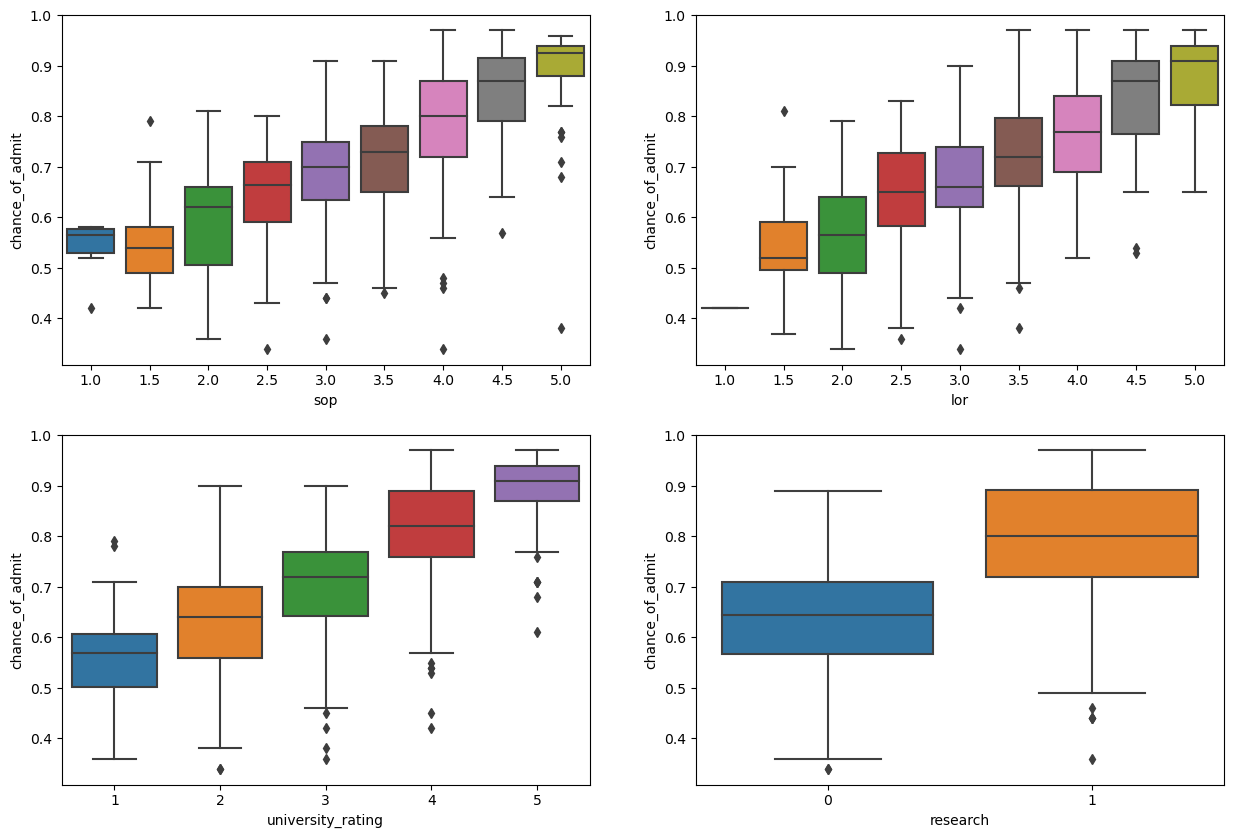

In [31]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(y = df["chance_of_admit"], x = df["sop"])
plt.subplot(2,2,2)
sns.boxplot(y = df["chance_of_admit"], x = df["lor"])
plt.subplot(2,2,3)
sns.boxplot(y = df["chance_of_admit"], x = df["university_rating"])
plt.subplot(2,2,4)
sns.boxplot(y = df["chance_of_admit"], x = df["research"])
plt.show()

- from above plots, we can observe , statement of purpose SOP strength is positively correlated with Chance of Admission .
- we can also similar pattern in Letter of Recommendation Stength and University rating , have positive correlation with Chaces of Admission .
- Student having research has higher chances of Admission , but also we can observe some outliers within that caregory.

#### Encoding

#### Data Split

In [214]:
X = df.drop(target_col, axis=1).values
y = df[target_col] #.values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # test train split 
X_train.shape,X_test.shape, y_train.shape, y_test.shape # after spliting, checking for the shape of test and train data

((400, 8), (100, 8), (400,), (100,))

#### Feature Scaling

In [215]:
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
# Fit only on training data
scaler_X.fit(X_train)
# Transform both train and test
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

#### Train Model

In [226]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() # training LinearRegression model
model.fit(X_train,y_train)

ws = pd.DataFrame(model.coef_.reshape(1,-1),columns=df.columns[:-1])
ws["Intercept"] = model.intercept_
ws

,serial_no.,gre_score,toefl_score,university_rating,sop,lor,cgpa,research,Intercept
0,0.000089,0.002481,0.003435,0.002633,0.004231,0.014953,0.109066,0.02229,-1.475467


#### Predict Traget

In [227]:
y_pred = model.predict(X_test)

#### Assumptions of LR

Assumption Checks
- Linearity: Residuals vs Predicted plot (should look random)
- Normality: Histogram of residuals + Q-Q plot
- Homoscedasticity: Residuals vs Predicted (no funnel shape)
- Independence (no autocorrelated):	Durbin-Watson Test (value ~2 is good)
- Mean of Residuals Zero: np.mean(residuals) ≈ 0
- Multicollinearity bw Features: VIF (Variance Inflation Factor) < 5

Problem	Fix
- Non-linearity: Apply transformations (log, sqrt, polynomial features)
- Non-normal residuals:	Transform target (log, PowerTransformer)
- Heteroscedasticity:	Use Weighted Least Squares (WLS), transform target
- Autocorrelated residuals:	Use time series models (ARIMA), add lag features
- Outliers: Use Robust models (RANSAC, HuberRegressor, Tree)
- High multicollinearity:	Remove/combine features (VIF), use PCA or regularization

-0.00571147443626699


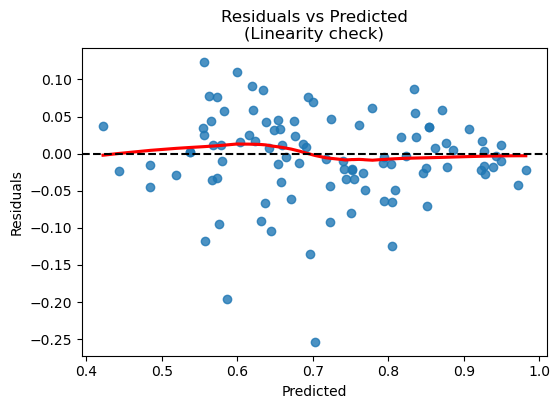

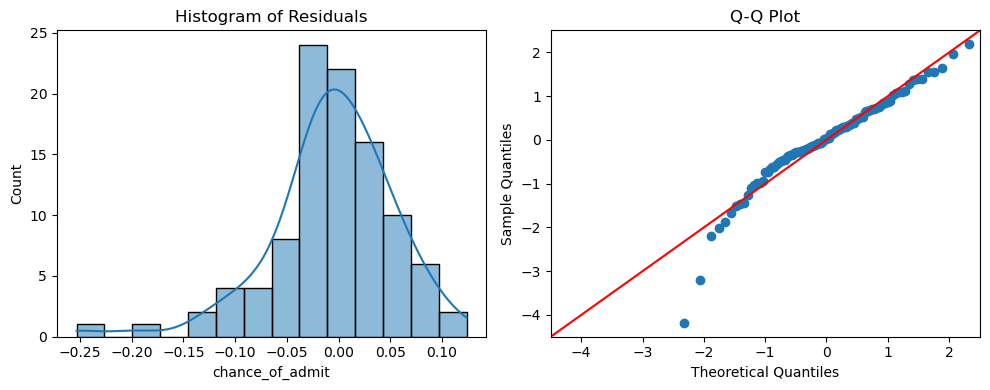

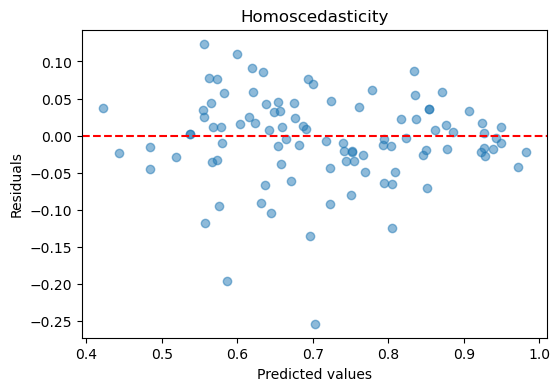

🔎 Variance Inflation Factor (VIF):
             Feature       VIF
0         serial_no.  1.050879
1          gre_score  4.491743
2        toefl_score  3.711993
3  university_rating  2.572146
4                sop  2.823664
5                lor  2.007198
6               cgpa  4.683376
7           research  1.523035

🔍 Durbin-Watson Statistic: 2.179 (1.5 to 2.5 is generally okay)


In [228]:
# Can use OLS model for residuals, if pre checking assumptions before applying linear model.
# X_const = sm.add_constant(X_scaled)
# model = sm.OLS(y, X_const).fit()
# print(model.summary())            
# OLS is good for Interpreting relationships, doing EDA, see summary.
# y_pred = model.predict(X_test)

residuals = y_test - y_pred
print(np.mean(residuals))       

import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

## 1. Linearity
plt.figure(figsize=(6, 4))
sns.regplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuals vs Predicted\n(Linearity check)")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()

## 2. Normality of residuals
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.histplot(residuals, kde=True, ax=axes[0])
axes[0].set_title("Histogram of Residuals")

import statsmodels.api as sm
sm.qqplot(residuals, line='45', fit=True, ax=axes[1])
axes[1].set_title("Q-Q Plot")
plt.tight_layout()
plt.show()

## 3. Homoscedasticity
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Homoscedasticity")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.show()
# visually look for:
# No clear pattern or shape → ✅ Homoscedasticity
# Funnel or cone shape → ❌ Heteroscedasticity (non-constant variance of residuals)

## 4. Multicollinearity (VIF)
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["Feature"] = df.drop(target_col, axis=1).columns
vif["VIF"] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]
print("🔎 Variance Inflation Factor (VIF):")
print(vif)

## 5. Independence of Errors (Durbin-Watson Test)
from statsmodels.stats.stattools import durbin_watson
dw = durbin_watson(residuals)
print(f"\n🔍 Durbin-Watson Statistic: {dw:.3f} (1.5 to 2.5 is generally okay)")

##### Target Trasformation (if assumption violated)

In [224]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 2. Feature Scaling ===
scaler_X = StandardScaler()
# Fit only on training data
scaler_X.fit(X_train)
# Transform both train and test
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# === 3. Target Transformation ===
pt_y = PowerTransformer(method='yeo-johnson')
# Transform y_train not y_test
pt_y.fit(y_train.values.reshape(-1, 1))
y_train_trans = pt_y.transform(y_train.values.reshape(-1, 1)).flatten()

# ===. Log Transformation ===
# If values are all positive:
# y_pred_flip = y_train.max() + 1 - y_train     # flip the y if its left skewed
# y_train_trans = np.log1p(y_pred_flip)      # log(1 + y_train) is safe for 0 values
# y_train_trans = np.sqrt(y_train)       # Square root transformation

# === 4. Train the model ===
model = LinearRegression()
model.fit(X_train_scaled, y_train_trans)

# === 5. Predict and Inverse Transform ===
y_pred_trans = model.predict(X_test_scaled)

# === Inverse Power Transform  ===
y_pred = pt_y.inverse_transform(y_pred_trans.reshape(-1, 1)).flatten()

# === Inverse log1p ===
# y_pred_flip = np.expm1(y_pred_trans)  # exp(y) - 1
# y_pred_original = y_train.max() + 1 - y_pred_flip    # Inverse flipping
# === Inverse sqrt ===
# y_pred_original = np.square(y_pred_transformed)


# === 6. Evaluate the model ===
print("MAE          :",mean_absolute_error(y_test,y_pred) ) # MAE
print("MSE          :",mean_squared_error(y_test,y_pred)) # MSE
print("RMSE         :",np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print("r2_score     :",r2_score(y_test,y_pred)) # r2score
def AdjustedR2score(R2,n,d):
    return 1-(((1-R2)*(n-1))/(n-d-1))
print("Adj R2 score :", AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1])) # adjusted R2 score

MAE          : 0.04365483736715521
MSE          : 0.003691201534700797
RMSE         : 0.06075525931720477
r2_score     : 0.8195011474473939
Adj R2 score : 0.8165602292795306


workflow:
- Fit the linear regression model

- Calculate residuals

- Check assumptions

- If assumptions are violated, apply fixes (transformations, robust methods)

- Refit the model and re-check assumptions

#### Evaluation

In [223]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
y_pred = model.predict(X_test)
print("MAE :",mean_absolute_error(y_test,y_pred) ) # MAE
print("MSE:",mean_squared_error(y_test,y_pred)) # MSE
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_pred))) #RMSE
print("r2_score:",r2_score(y_test,y_pred)) # r2score
def AdjustedR2score(R2,n,d):
    return 1-(((1-R2)*(n-1))/(n-d-1))
print("Adjusted R2 score :", AdjustedR2score(r2_score(y_test,y_pred),len(X),X.shape[1])) # adjusted R2 score

MAE : 0.043258852595452764
MSE: 0.0035511805450986994
RMSE: 0.059591782529965484
r2_score: 0.8263481396039756
Adjusted R2 score : 0.8235187813897837


#### Regularizations

In [269]:
# Penalize the Magnitude of Coefficients to reduce overfitting
# Compare models with base model LR and default hyperparameters
# Helps identify which types of models suit better with given data

                         R2       MAE      RMSE
Model                                          
Linear Regression  0.818843  0.042723  0.060866
Ridge              0.818789  0.042747  0.060875
Lasso              0.819183  0.042511  0.060809
ElasticNet         0.819032  0.042621  0.060834
KNN                0.780209  0.046400  0.067043
Decision Tree      0.633078  0.058827  0.086623
Random Forest      0.788675  0.043788  0.065739
Gradient Boosting  0.782626  0.046206  0.066673
SVR                0.758938  0.056360  0.070212
Neural Network     0.473779  0.078502  0.103736


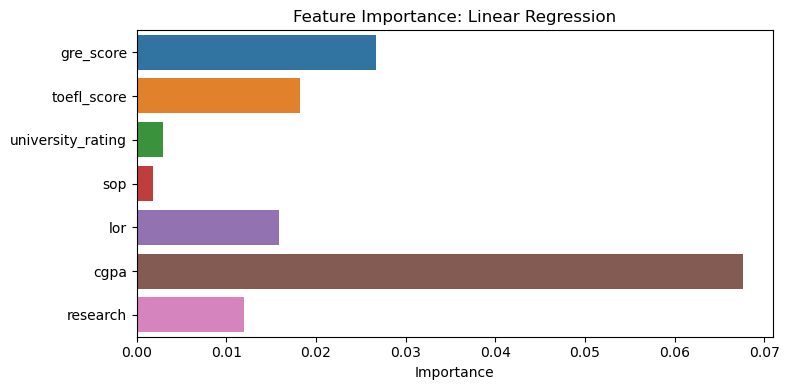

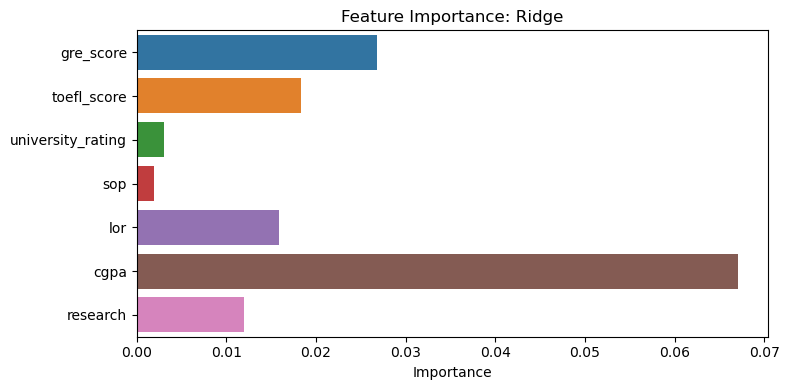

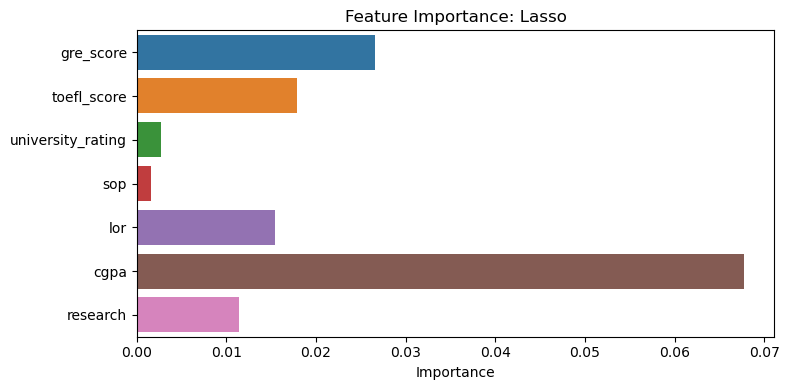

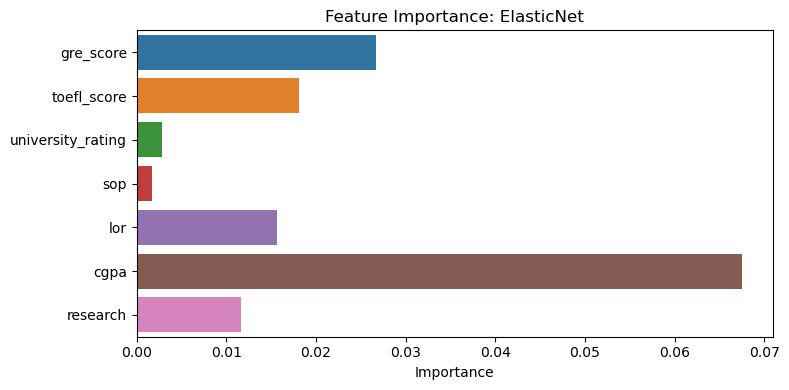

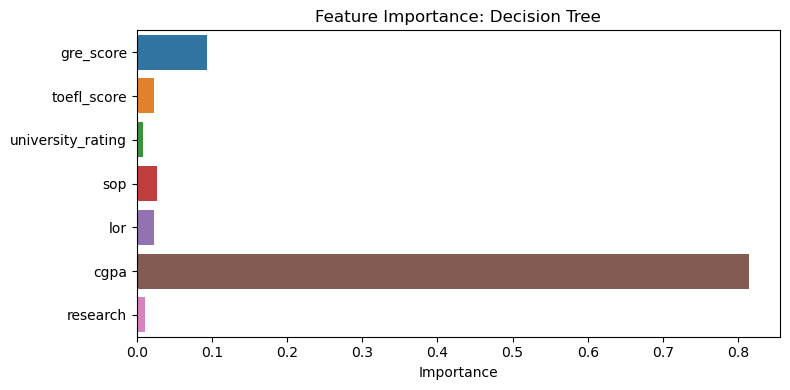

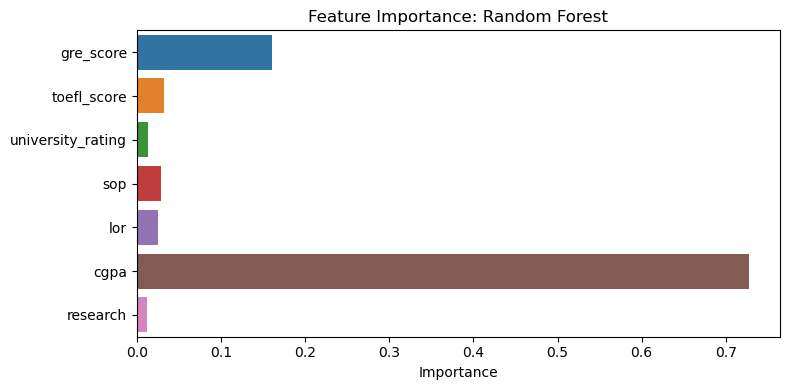

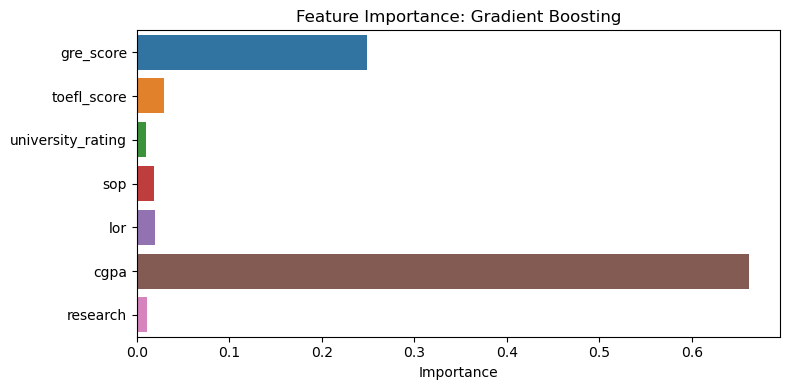

In [262]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

# ==== 1. Load and Split Data ====
X = df.drop(target_col, axis=1)
y = df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

# ==== 2. Scale Features ====
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==== 3. Define Models ====
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.001, max_iter=10000),
    "ElasticNet": ElasticNet(alpha=0.001, l1_ratio=0.5, max_iter=10000),
    "KNN": KNeighborsRegressor(n_neighbors=5),
    "Decision Tree": DecisionTreeRegressor(max_depth=10),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "SVR": SVR(kernel='rbf', C=1.0),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
}

# ==== 4. Evaluate & Store Metrics ====
metrics = []
feature_importances = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    metrics.append([name, r2, mae, rmse])

    # Coefficients or Feature Importances
    if hasattr(model, 'coef_'):
        feature_importances[name] = pd.Series(model.coef_.flatten() if hasattr(model.coef_, 'flatten') else model.coef_, index=X.columns)
    elif hasattr(model, 'feature_importances_'):
        feature_importances[name] = pd.Series(model.feature_importances_, index=X.columns)

# ==== 5. Create Metrics Report ====
metrics_df = pd.DataFrame(metrics, columns=["Model", "R2", "MAE", "RMSE"]).set_index("Model")
print(metrics_df)

# ==== 6. Plot Feature Importances ====
for name, imp in feature_importances.items():
    plt.figure(figsize=(8, 4))
    sns.barplot(x=imp.values, y=imp.index)
    plt.title(f"Feature Importance: {name}")
    plt.xlabel("Importance")
    plt.tight_layout()
    plt.show()


###

#### Model Tunning

In [264]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# ==== 1. Prepare your data ====
# X = df.drop("target_column", axis=1)
# y = df["target_column"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ==== 2. Scale features ====
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==== 3. Define Models & Hyperparameters ====

# Ridge: L2 Regularization
ridge_params = {
    'alpha': [0.01, 0.1, 1, 10, 100]  # Strength of regularization
}

# Lasso: L1 Regularization
lasso_params = {
    'alpha': [0.001, 0.01, 0.1, 1, 10],  # Controls how many features get zeroed out
    'max_iter': [10000]  # Ensures convergence
}

# ElasticNet: Combo of L1 & L2
elastic_params = {
    'alpha': [0.01, 0.1, 1, 10],
    'l1_ratio': [0.1, 0.5, 0.9],  # 0.0 = Ridge, 1.0 = Lasso
    'max_iter': [10000]
}

# ==== 4. Perform Grid Search for Each Model ====

def tune_and_evaluate(model, param_grid, name):
    grid = GridSearchCV(model, param_grid, cv=5, scoring='r2')
    grid.fit(X_train_scaled, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test_scaled)

    # Evaluation metrics
    print(f"\n✅ {name} Best Parameters: {grid.best_params_}")
    print(f"🔹 R² Score      : {r2_score(y_test, y_pred):.4f}")
    print(f"🔹 MAE           : {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"🔹 RMSE          : {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
    return best_model

# Run tuning and evaluation
ridge_model = tune_and_evaluate(Ridge(), ridge_params, "Ridge Regression")
lasso_model = tune_and_evaluate(Lasso(), lasso_params, "Lasso Regression")
elastic_model = tune_and_evaluate(ElasticNet(), elastic_params, "ElasticNet Regression")



✅ Ridge Regression Best Parameters: {'alpha': 10}
🔹 R² Score      : 0.8183
🔹 MAE           : 0.0429
🔹 RMSE          : 0.0610

✅ Lasso Regression Best Parameters: {'alpha': 0.001, 'max_iter': 10000}
🔹 R² Score      : 0.8192
🔹 MAE           : 0.0425
🔹 RMSE          : 0.0608

✅ ElasticNet Regression Best Parameters: {'alpha': 0.01, 'l1_ratio': 0.1, 'max_iter': 10000}
🔹 R² Score      : 0.8190
🔹 MAE           : 0.0426
🔹 RMSE          : 0.0608


Text(0.5, 0, 'Alpha (Lambda)')

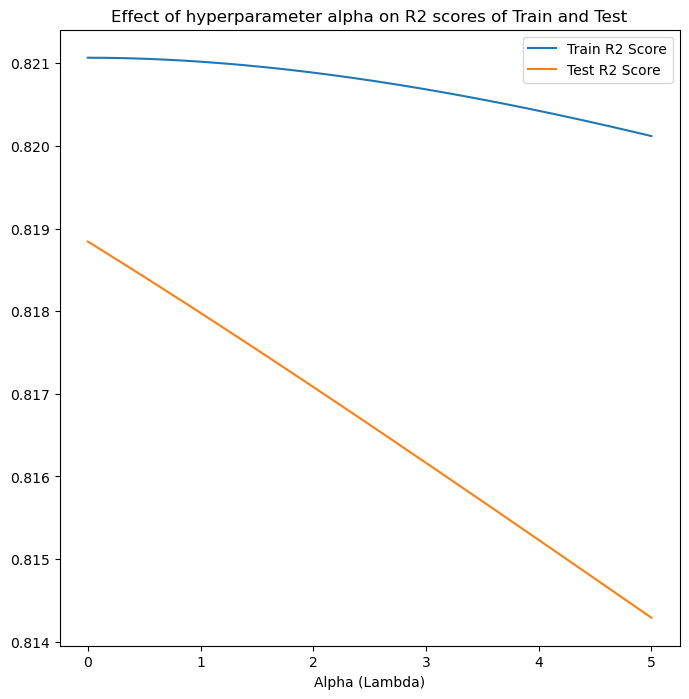

In [267]:
## Hyperparameter Tuning : for appropriate lambda value :

train_R2_score = []
test_R2_score = []
lambdas = []
train_test_difference_Of_R2 = []
lambda_ = 0
while lambda_ <= 5:
    lambdas.append(lambda_)
    RidgeModel = Ridge(lambda_)
    RidgeModel.fit(X_train,y_train)
    trainR2 = RidgeModel.score(X_train,y_train)
    testR2 = RidgeModel.score(X_test,y_test)
    train_R2_score.append(trainR2)
    test_R2_score.append(testR2)
    lambda_ += 0.01

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 8))
sns.lineplot(x=lambdas, y=train_R2_score, label='Train R2 Score')
sns.lineplot(x=lambdas, y=test_R2_score, label='Test R2 Score')
plt.legend()
plt.title("Effect of hyperparameter alpha on R2 scores of Train and Test")
plt.xlabel("Alpha (Lambda)")

#### Actionable Insights

**Insights, Feature Importance and Interpretations and Recommendations:**
- The Fist column was observed as unique row identifier, which was dropped and was not required for model building. 
- Independent Variables (Input data): GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, Research
- Target/Dependent Variable: Chance of Admit (numeric continuous value we want to predict)
- University Rating, SOP and LOR strength and research seem to be discrete random Variables, but they are categorical ordinal data in number formate.
- All the other features are numeric continuous. 

- No change in data type required, no grouping required.
- NO duplicates, No null values were present in data. 
- No Significant amount of outliers were found in data.

- Range of GRE score looks like between 290 to 340.
- Range of TOEFL score is between 92 to 120.
- University rating, SOP and LOR are distributed between range of 1 to 5. 
- CGPA range is between 6.8 to 9.92.

- Chance of admission(target variable) and GRE score(an independent feature) are nearly normally distributed.
- Chance of admission(target variable) and GRE score(an independent feature) are nearly normally distributed.
- From correlation heatmap , we can observe GRE score, TOEFL score and CGPA have very high correlation with Change of admission. 
- University rating, SOP ,LOR and Research have comparatively slightly less correlated than other features.
- chances of admit is a probability measure , which is within 0 to 1 which is good (no outliers or misleading data in column). 

- From boxplots (distribution of chance of admission (probability of getting admission) as per GRE score): with higher GRE score, there is the high probability of getting an
admission. 
-Students having high toefl score have a higher probability of getting admission.

***Actionable Insights and Recommendations***
- The education institute can not just help student to improve their GRE Score but can also assist them writing good LOR and SOP thus helping them admit to a
better University. 
- Awareness of CGPA and Reserach Capabilities: Seminars can be organised to increase the awareness regarding CGPA and Research Capablities to enhance the
chance of admit. 
- Any student can never change their current state of attributes so awareness and marketing campaign need to surveyed hence creating a first impression on student
at undergraduate level, which wont just increase company's popularity but will also help sudent get prepared for future plans in advance. 
- A dashboard can be created for students whenever they loged in into your website, hence allowing a healthy competition also to create a progress report for
students. 
- Additional features like number of hours they put in studying, watching lectures, assignments solved percentage, marks in mock tests can result in a better report for
every student to judge themselves and improve on their own.


**Regression Analysis:**
- From regression analysis (above bar chart and REPORT file), we can observe the CGPA is the most Important feature for prediciing the chances of admission.
- Other important features are GRE and TOEFL score .
- After first Regression Model, checked for Multicolinearity . Getting all the VIF scores below 5 , showing there's no high multicolinearity.
- All the residuals are not perfectly normally distributed. and so residual plot we can observe some level of heteroscedasticity.
- Regularised model ridge and lasso both give very similar results to Linear Regression Model.
- Similarly ElasticNet (L1+L2) also returns very similar results. along with rest of all the model metrics.
